<a href="https://colab.research.google.com/github/zmohaghegh/Sales-Forecasting-XGBoost/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


/tmp/ipython-input-805957895.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'month': pd.date_range(start='2020-01-01', periods=24, freq='M'),


Mean Absolute Error: 14.613222122192383


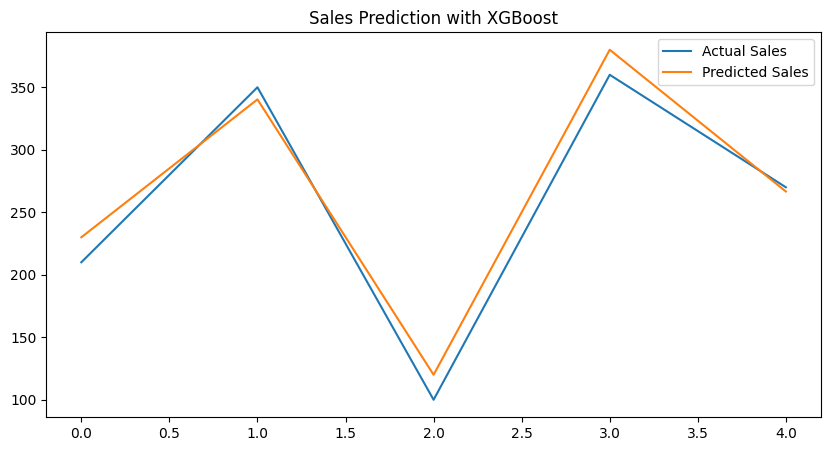

In [3]:
!pip install sklearn.metrics
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # یا mean_squared_error
from sklearn.metrics import root_mean_squared_error

import matplotlib.pyplot as plt

# ۱. ساخت داده‌های فرضی (چون فایل نداری، این بخش داده می‌سازد)
# در پروژه واقعی، اینجا فایل CSV خودت را Load می‌کنی
data = {
    'month': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'sales': [100, 120, 130, 150, 170, 160, 180, 200, 210, 230, 250, 270,
              260, 280, 300, 320, 350, 340, 360, 380, 400, 420, 450, 470]
}
df = pd.DataFrame(data)

# ۲. مهندسی ویژگی (Feature Engineering)
df['month_num'] = df['month'].dt.month
df['year'] = df['month'].dt.year

# ۳. آماده‌سازی برای مدل
X = df[['month_num', 'year']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ۴. تعریف مدل XGBoost
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    objective='reg:squarederror'
)

# ۵. آموزش مدل
model.fit(X_train, y_train)

# ۶. پیش‌بینی و ارزیابی
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# ۷. رسم نمودار برای نمایش در گیت‌هاب
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.legend()
plt.title('Sales Prediction with XGBoost')
plt.show()